<center><u><H1>Seaborn-Categorical Data</H1></u></center>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## <u>Categorical Plots:</u>

### Bar Plot:

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


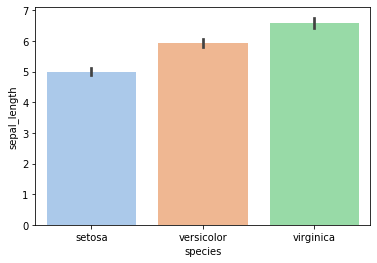

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=df["species"], y=df["sepal_length"], palette="pastel",data=df,ax=ax,estimator=lambda x: sum(x)/len(x))

### you can use an estimator function.

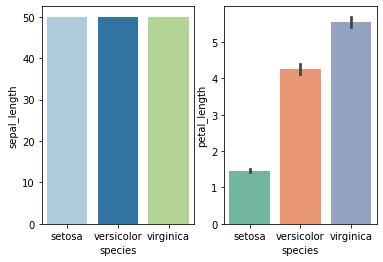

In [4]:
fig, ax = plt.subplots(1,2,figsize=(6,4))
sns.barplot(x=df["species"], y=df["sepal_length"], palette="Paired",data=df,ax=ax[0],estimator=np.count_nonzero)
sns.barplot(x=df["species"], y=df["petal_length"], palette="Set2",data=df,ax=ax[1],estimator=np.mean)

### Boxplot:

In [5]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


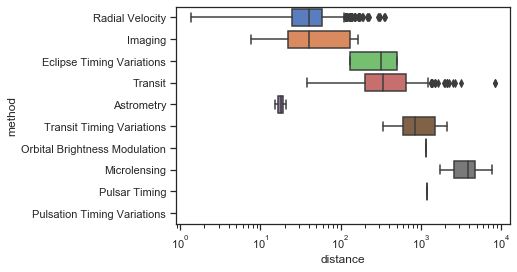

In [6]:
sns.set(style="ticks", palette="muted")
ax = sns.boxplot(x="distance", y="method", data=planets)
ax.set_xscale("log")

### Violin Plot:

In [7]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


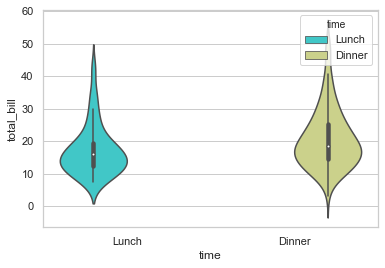

In [8]:
sns.set(style="whitegrid")
sns.violinplot(x="time",y="total_bill", data=tips, palette="rainbow", hue='time')

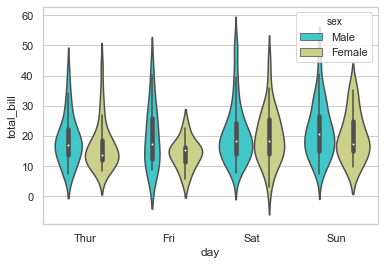

In [9]:
sns.violinplot(x="day",y="total_bill", data=tips, palette="rainbow", hue='sex')

#### Grouped violinplots with split violins

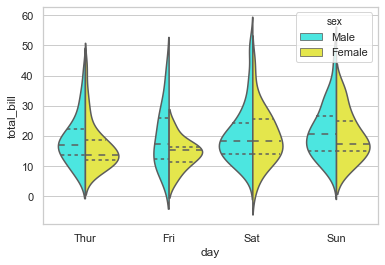

In [10]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,inner="quart",
               palette={"Male": "#33FFF8", "Female": "#FDFF33"})

### Scatter Plot Matrix: Pairplot () function

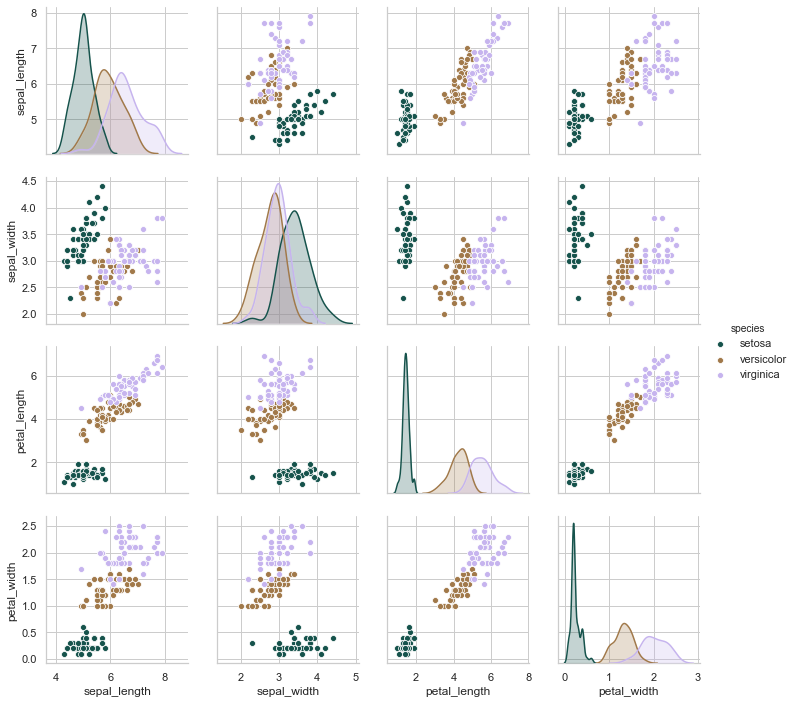

In [11]:
sns.pairplot(df, hue="species", palette='cubehelix')

### Cat Plot: It is the general form for a plot

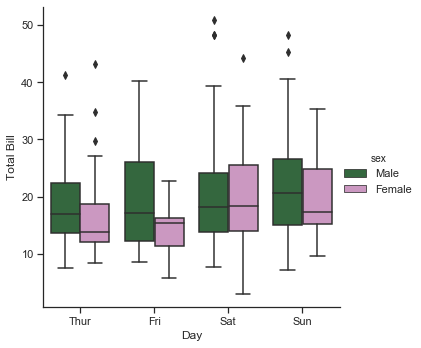

In [12]:
sns.set(style="ticks")
g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box", palette='cubehelix')
g.set_axis_labels("Day", "Total Bill")

## Facet Grid:
Is used to draw plots with multiple Axes where each Axes shows the same relationship conditioned on different levels of some variable. It’s possible to condition on up to three variables by assigning variables to the rows and columns of the grid and using different colors for the plot elements.
The basic workflow is to initialize the FacetGrid object with the dataset and the variables that are used to structure the grid. Then one or more plotting functions can be applied to each subset by calling FacetGrid.map() or FacetGrid.map_dataframe(). Finally, the plot can be tweaked with other methods to do things like change the axis labels, use different ticks, or add a legend. 

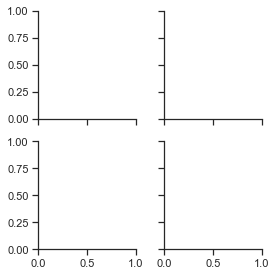

In [13]:
sns.set(style="ticks")
g = sns.FacetGrid(tips, col="time", row="smoker",height=2)

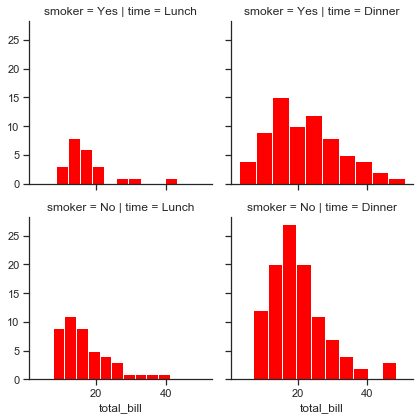

In [14]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill", color='red')

### Change the size and aspect ratio of each facet:

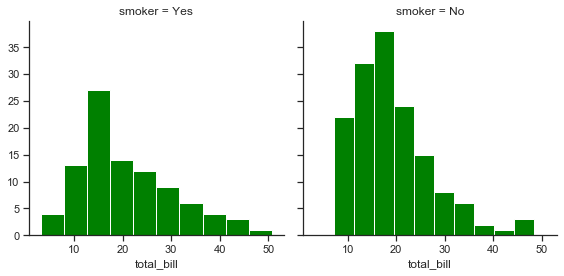

In [15]:
g = sns.FacetGrid(tips, col="smoker", col_order=["Yes", "No"], height=4, aspect=1)
g.map(plt.hist, "total_bill", color="green")

### Setting the color palette:

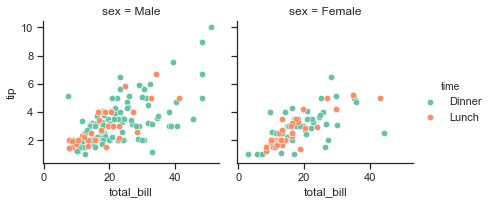

In [16]:
kws = dict(s=40, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col="sex", hue="time", palette="Set2", hue_order=["Dinner", "Lunch"])
g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())

### Use a different marker for the hue levels:

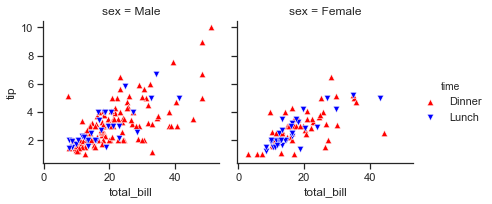

In [17]:
palette = dict(Lunch="blue", Dinner="red")
g = sns.FacetGrid(tips, col="sex", hue="time", palette=palette,
                  hue_order=["Dinner", "Lunch"],
                  hue_kws=dict(marker=["^", "v"]))
g = (g.map(plt.scatter, "total_bill", "tip", **kws).add_legend())

### Use different axes labels after plotting:

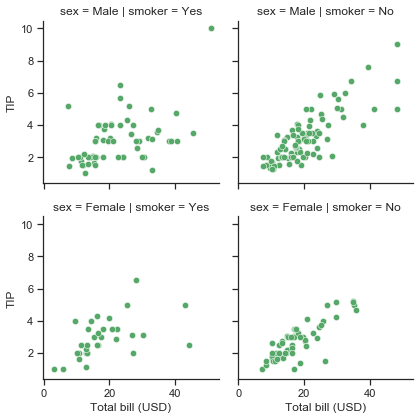

In [18]:
g = sns.FacetGrid(tips, col="smoker", row="sex")
g = (g.map(plt.scatter, "total_bill", "tip", color="g", **kws)
     .set_axis_labels("Total bill (USD)", "TIP"))

## Reference:

http://seaborn.pydata.org/tutorial/categorical.html

https://seaborn.pydata.org/tutorial/color_palettes.html